In [179]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp #for Runge-Kutta Method

In [180]:
# Initial conditions
r0 = 1.0  # Initial value of r
t0 = 0.0  # Initial time
tf = 10.0  # Final time
h = 0.01  # Step size

# Number of steps
N = int((tf - t0) / h)

# Store the values of t, r, and r_dot
t_values = np.linspace(t0, tf, N+1)
r_values = np.zeros(N+1)
r_dot_values = np.zeros(N+1)

# Initial condition
r_values[0] = r0

# Euler's method
for n in range(N):
    t = t_values[n]
    r = r_values[n]
    r_dot = t / r**2
    r_values[n+1] = r + h * r_dot
    r_dot_values[n+1] = r_dot

In [181]:
# Results Table
results_table = np.vstack((t_values, r_values, r_dot_values)).T

# Print Results Table
print("Time (t) | r(t)   | r_dot(t)")
print("--------------------------------")
for row in results_table[:10]: 
    print(f"{row[0]:.2f}     | {row[1]:.2f} | {row[2]:.2f}")

Time (t) | r(t)   | r_dot(t)
--------------------------------
0.00     | 1.00 | 0.00
0.01     | 1.00 | 0.00
0.02     | 1.00 | 0.01
0.03     | 1.00 | 0.02
0.04     | 1.00 | 0.03
0.05     | 1.00 | 0.04
0.06     | 1.00 | 0.05
0.07     | 1.00 | 0.06
0.08     | 1.00 | 0.07
0.09     | 1.00 | 0.08


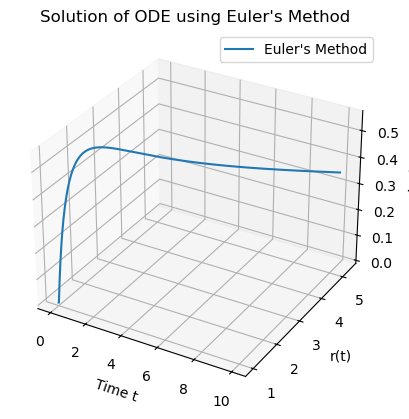

In [182]:
# Plot 3D results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t_values, r_values, r_dot_values, label='Euler\'s Method')

ax.set_xlabel('Time t')
ax.set_ylabel('r(t)')
ax.set_zlabel('r_dot(t)')
ax.set_title('Solution of ODE using Euler\'s Method')

plt.legend()
plt.show()

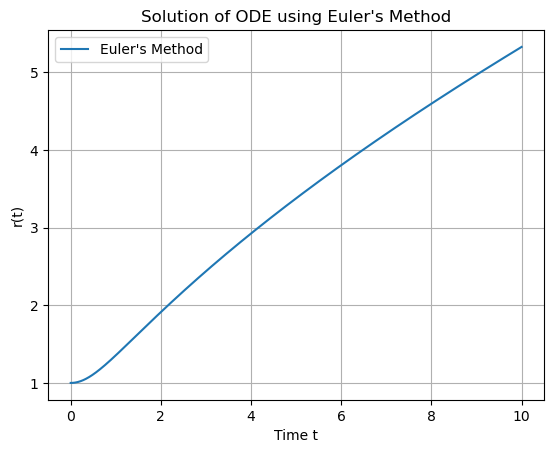

In [183]:
# Plot 2D results
plt.plot(t_values, r_values, label='Euler\'s Method')
plt.xlabel('Time t')
plt.ylabel('r(t)')
plt.title('Solution of ODE using Euler\'s Method')
plt.legend()
plt.grid(True)
plt.show()

Time (t) | r(t)   | r_dot(t)
--------------------------------
0.00     | 1.00 | 0.00
0.01     | 1.00 | 0.01
0.02     | 1.00 | 0.02
0.03     | 1.00 | 0.03
0.04     | 1.00 | 0.04
0.05     | 1.00 | 0.05
0.06     | 1.00 | 0.06
0.07     | 1.00 | 0.07
0.08     | 1.00 | 0.08
0.09     | 1.00 | 0.09


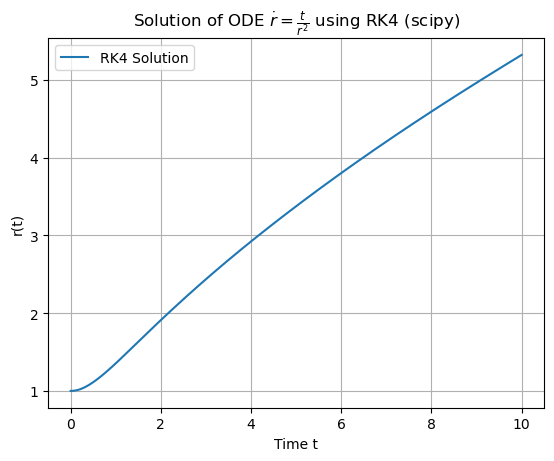

In [187]:
# Runge-Kutta Method

# Define the ODE
def f(t, r):
    return t / r**2

# Same initial conditions

# Define the time span for the solution
t_span = (t0, tf)

# Define the time points where the solution is computed
t_eval = np.linspace(t0, tf, 1000)

# Solve the ODE using solve_ivp which is the Runge-Kutta method
sol = solve_ivp(f, t_span, [r0], method='RK45', t_eval=t_eval)

# Extract solutions
t_values = sol.t
r_values = sol.y[0]

# Compute r_dot_values using the ODE
r_dot_values = f(t_values, r_values)

# Results Table
results_table = np.vstack((t_values, r_values, r_dot_values)).T

print("Time (t) | r(t)   | r_dot(t)")
print("--------------------------------")
for row in results_table[:10]:  
    print(f"{row[0]:.2f}     | {row[1]:.2f} | {row[2]:.2f}")

# Plot r(t) vs time in 2D
plt.plot(t_values, r_values, label='RK4 Solution')
plt.xlabel('Time t')
plt.ylabel('r(t)')
plt.title('Solution of ODE $\dot{r} = \\frac{t}{r^2}$ using RK4 (scipy)')
plt.legend()
plt.grid(True)
plt.show()
